## CE9010: Introduction to Data Science
## Semester 2 2017/18
## Xavier Bresson
## ⚠ Student name: 
<br>


## Laboratory test 2: Supervised logistic regression
Instruction: Check the box with the right answer.<br>

Grading: You will receive 1 point for each of the questions you answer correctly.<br>
$ $


In [2]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# scientific computing library
from scipy.optimize import minimize

# scikit-learn library
from sklearn.preprocessing import PolynomialFeatures

# computational time
import time

# remove warning
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


# Introduction
<hr>
For the supervised logisitic regression task, we consider here $n$ training data $x_i, i=1,...,n$. Each data $x_i$ has d=2 features represented by $x=(x_{i(1)},x_{i(2)})$ and a label $y_i$.<br>

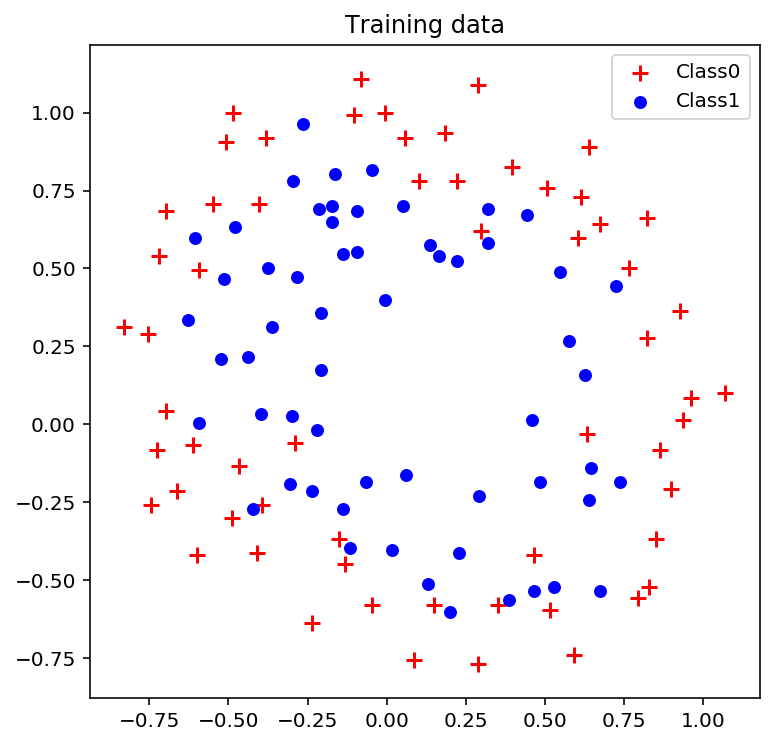

In [3]:
# import data with numpy
data = np.loadtxt('data/lab02_train_data.txt', delimiter=',')

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.title('Training data')
plt.legend()
plt.show()

### Q1: What are the mean value and the variance of the 1st data feature $x_{(1)}$?
<hr>

☐ mean=0.054, var=0.38 <br>
☐ mean=-0.054, var=0.24 <br>
☐ mean=0.054, var=0.24 <br>
☐ mean=0.028, var=0.43 <br>

Hint: You may use functions np.mean and np.var.

In [4]:
#YOUR CODE HERE
mean = np.mean(x1)
variance = np.var(x1)
print(mean, variance)

0.05477898305084747 0.24457460249896587


### Q2: Compute the mean value of the linear logistic regression function $f_w(x_i)$ applied to all training data $x_i,  i=1,...,n$ for $w=[1,1,1]$.
<hr>

☐ mean( $f(x_i)$ ) = 0.35<br>
☐ mean( $f(x_i)$ ) = 0.57<br>
☐ mean( $f(x_i)$ ) = 0.23<br>
☐ mean( $f(x_i)$ ) = 0.75<br>


Hints: 

1) Reminder of the linear logistic regression function:

$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ with }
\quad
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ , }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right],
$$

and the sigmoid/logistic function is $\sigma(\eta) = 1/(1+e^{-\eta})$.

2) Construct the $X$ matrix:
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
$$

You may use the function `PolynomialFeatures` from sklearn library to automatically construct $X$. The function `PolynomialFeatures` generates a matrix consisting of **all polynomial combinations of the features** with degree less than or equal to a given value. Description of the function is given here:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html<br>

Usage example: <br>
$\hspace{1cm}$ `from sklearn.preprocessing import PolynomialFeatures`<br>
$\hspace{1cm}$ `degree = 1 # degree=polynomial degree, degree=1 for linear features`<br>
$\hspace{1cm}$ `poly = PolynomialFeatures(degree)`<br>
$\hspace{1cm}$ `X = poly.fit_transform(data[:,0:2]) # input consists of the d data features`<br>
        
3) Compute the predictive function $f_w(x_i)$ for all training data $x_i,  i=1,...,n$ for $w=[1,1,1]$

4) Compute the mean value of $f_w(x_i)$. You may use `np.mean`.

In [5]:
# data features
degree = 1 # linear features
poly = PolynomialFeatures(degree)
X = poly.fit_transform(data[:,0:2])
print(X.shape)
w = np.array([[1,1,1]]).T
print(w)

#YOUR CODE HERE
# sigmoid function
def sigmoid(z):
    sigmoid_f = 1 / (1 + np.exp(-z)) 
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p = sigmoid(X.dot(w)) 
    return p

y_pred = f_pred(X,w)
mean_func = np.mean(y_pred)
print(mean_func)

(118, 3)
[[1]
 [1]
 [1]]
0.7555142953011778


### Q3: Compute the value of the linear logistic regression loss using all training data $x_i,  i=1,...,n$ and $w=[1,1,1]$?
<hr>

☐ loss = 0.63<br>
☐ loss = 0.93<br>
☐ loss = 0.45<br>
☐ loss = 0.76<br>


Hint: Reminder of the logistic regression loss:

$$
L(w)=-\frac{1}{n} \sum_{i=1}^n \ \Big(  y_i \log(p_w(x_i)) + (1-y_i)\log(1-p_w(x_i)) \Big)
$$

The vectorized representation is:
$$
L(w)=-\frac{1}{n} \Big( y^T \log(p_w(x)) + (1-y)^T \log(1-p_w(x)) \Big)
$$
with 
<br>
$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

In [6]:
# loss function definition
def loss_logreg(w,X,y): 
    n = len(y)
    y_pred = f_pred(X,w)
    loss = -1/n* ( y.T.dot(np.log(y_pred+1e-10)) + (1-y).T.dot(np.log(1-y_pred+1e-10)) ) 
    return loss

y = data[:,2][:,None] # label

#YOUR CODE HERE
ans3 = loss_logreg(w,X,y)
print(ans3)

[[0.93903703]]


### Q4: Compute the value of the linear logistic regression loss using all training data $x_i,  i=1,...,n$ and the   solution $w$ that optimizes the loss?
<hr>

☐ loss = 0.36<br>
☐ loss = 0.69<br>
☐ loss = 0.13<br>
☐ loss = 0.87<br>


Hints: 

1) The  solution $w$ that optimizes the logistic regression loss is defined as:

$$
\min_w \ L(w)=-\frac{1}{n} \Big( y^T \log(p_w(x)) + (1-y)^T \log(1-p_w(x)) \Big) \quad (1)
$$

2) You may use the function `minimize` from scipy library to automatically **find the $w$ solution that optimizes the logistic regression loss (1)**. The function `minimize` computes the minimizer $w$ of a function given some initial value `initial_w` and input arguments `args`. Description of the function is given here:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html<br>

Usage example: <br>
$\hspace{1cm}$ `from scipy.optimize import minimize`<br>
$\hspace{1cm}$ `initial_w = np.zeros((X.shape[1],1)) # initial value`<br>
$\hspace{1cm}$ `result = minimize(loss_logreg, initial_w, args=(X,y), method='Powell', options={'maxiter':500})`<br>
$\hspace{1cm}$ `w_solution = np.array(result.x)[:,None]`<br>
        
3) Compute the loss value with the solution `w_solution`. 

[[0.69024185]]


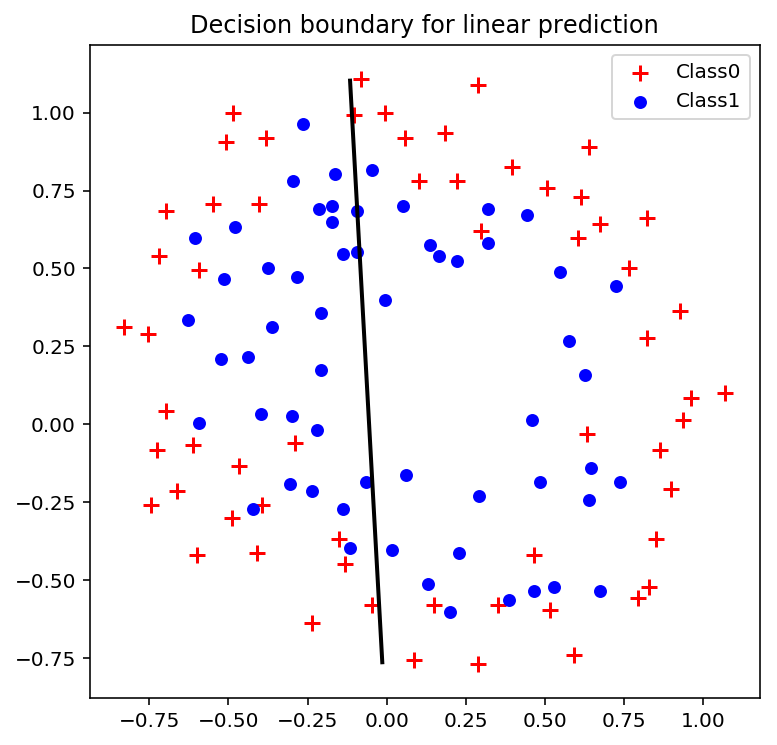

In [7]:
#YOUR CODE HERE

from scipy.optimize import minimize
initial_w = np.zeros((X.shape[1],1)) # initial value
result = minimize(loss_logreg, initial_w, args=(X,y), method='Powell', options={'maxiter':500})
w_solution = np.array(result.x)[:,None]
    
ans4 = loss_logreg(w_solution,X,y)
print(ans4)

def plot_decision_boundary(X,w,data,title,cpt_fig):

    # compute values p(x) for multiple data points x
    x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
    x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid

    n_mesh = xx1.reshape(-1).shape[0]
    mesh_data = np.zeros((n_mesh,2))
    mesh_data[:,0] = xx1.reshape(-1)
    mesh_data[:,1] = xx2.reshape(-1)
    mesh_X = poly.fit_transform(mesh_data)

    p = f_pred(mesh_X,w)
    p = p.reshape(xx1.shape)

    # plot
    x1 = data[:,0] # feature 1
    x2 = data[:,1] # feature 2
    idx_class0 = (data[:,2]==0) # index of class0
    idx_class1 = (data[:,2]==1) # index of class1
    plt.figure(cpt_fig,figsize=(6,6))
    plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
    plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
    plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
    plt.legend()
    plt.title(title)
    plt.show()

    
# plot decision boundary
plot_decision_boundary(X,w_solution,data,'Decision boundary for linear prediction',1)

In [8]:
### Q5: Compute the accuracy of the linear logistic regression model for the training data $x_i,  i=1,...,n$?
<hr>

☐ accuracy = 45.5%<br>
☐ accuracy = 72.2%<br>
☐ accuracy = 67.4%<br>
☐ accuracy = 55.0%<br>


Hint: You may use the function `compute_accuracy` given below.

SyntaxError: invalid syntax (<ipython-input-8-0a0e6e55fcd1>, line 2)

In [9]:
# accuracy
def compute_accuracy(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return accuracy

#YOUR CODE HERE
ans5a = compute_accuracy(X,w_solution,y)
ans5b = compute_accuracy(X,w,y)
print(ans5a,ans5b)

55.08474576271186 50.847457627118644


### Q6: Compute the value of the logistic regression loss using the training data $x_i,  i=1,...,n$ with a polynomial degree=6?
<hr>

☐ loss = 0.27<br>
☐ loss = 0.56<br>
☐ loss = 0.18<br>
☐ loss = 0.06<br>

In [10]:
# data features
degree = 6 
poly = PolynomialFeatures(degree)
X = poly.fit_transform(data[:,0:2])
print(X.shape)

#YOUR CODE HERE
from scipy.optimize import minimize
initial_w = np.zeros((X.shape[1],1)) # initial value
result = minimize(loss_logreg, initial_w, args=(X,y), method='Powell', options={'maxiter':500})
w_solution = np.array(result.x)[:,None]
    
ans6 = loss_logreg(w_solution,X,y)
print(ans6)

(118, 28)
[[0.27782748]]


### Q7: Compute the accuracy of the logistic regression model for the training data $x_i,  i=1,...,n$ with a polynomial degree=6?
<hr>

☐ accuracy = 58.7%<br>
☐ accuracy = 65.2%<br>
☐ accuracy = 86.4%<br>
☐ accuracy = 74.0%<br>


86.44067796610169


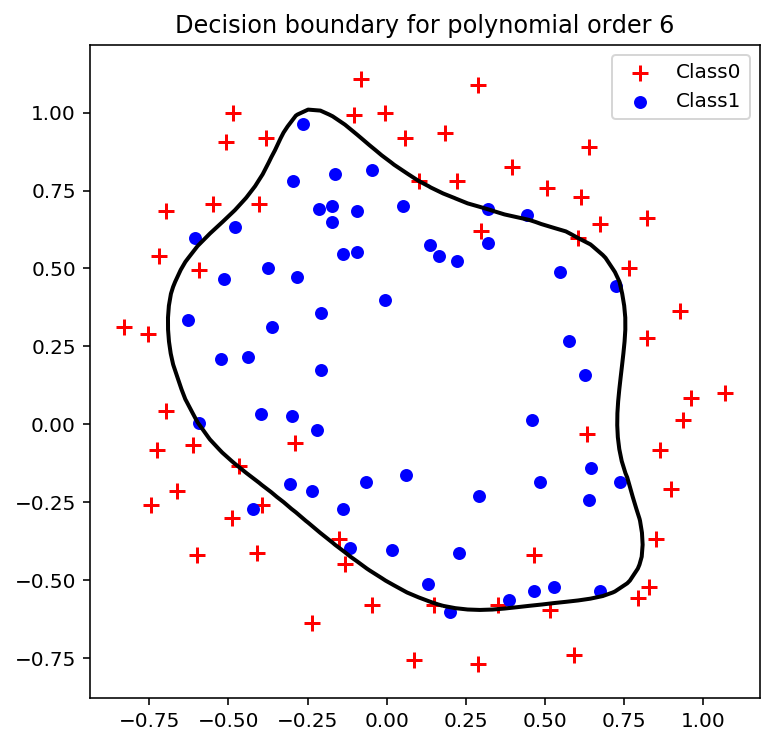

In [11]:
#YOUR CODE HERE

# accuracy
def compute_accuracy(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return accuracy

#YOUR CODE HERE
ans7 = compute_accuracy(X,w_solution,y)
print(ans7)


# plot decision boundary
plot_decision_boundary(X,w_solution,data,'Decision boundary for polynomial order 6',1)

### Q8: Compute the value of the **regularized** logistic regression loss using all training data $x_i,  i=1,...,n$, the polynomial degree=6 and the regularization value $\lambda$=0.1?
<hr>

☐ loss = 0.45<br>
☐ loss = 0.34<br>
☐ loss = 0.19<br>
☐ loss = 0.24<br>


Hints: 

1) Reminder of the logistic regression loss:

$$
L(w)=-\frac{1}{n} \Big( y^T \log(p_w(x)) + (1-y)^T \log(1-p_w(x)) \Big)
$$

The **regularized** logistic regression loss is defined as:

$$
L(w)=-\frac{1}{n} \Big( y^T \log(p_w(x)) + (1-y)^T \log(1-p_w(x)) \Big) + \frac{\lambda}{d} y^T y \quad (2)
$$


2) Re-define the `loss_logreg` function in Q3 with the new definition (2).

3) Change the input arguments of `minimize` function in Q4 to incorporate the regularization parameter $\lambda$. 

In [16]:
#YOUR CODE HERE

def loss_logreg(w,X,y,reg): 
    n = len(y)
    y_pred = f_pred(X,w)
    loss = -1/n* ( y.T.dot(np.log(y_pred+1e-10)) + (1-y).T.dot(np.log(1-y_pred+1e-10)) )
    d = w.shape[0]
    loss += reg/d * w.T.dot(w)
    return loss 

from scipy.optimize import minimize
initial_w = np.zeros((X.shape[1],1)) # initial value
reg = 0.1
result = minimize(loss_logreg, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':500})
w_solution = np.array(result.x)[:,None]

print(loss_logreg(w_solution,X,y,reg))

[[0.52369761]]


### Q9: Compute the accuracy of the regularized logistic regression model for all training data $x_i,  i=1,...,n$, the polynomial degree=6 and the regularization value $\lambda$=0.1?
<hr>

☐ accuracy = 93.6%<br>
☐ accuracy = 85.4%<br>
☐ accuracy = 81.3%<br>
☐ accuracy = 90.1%<br>


81.35593220338983


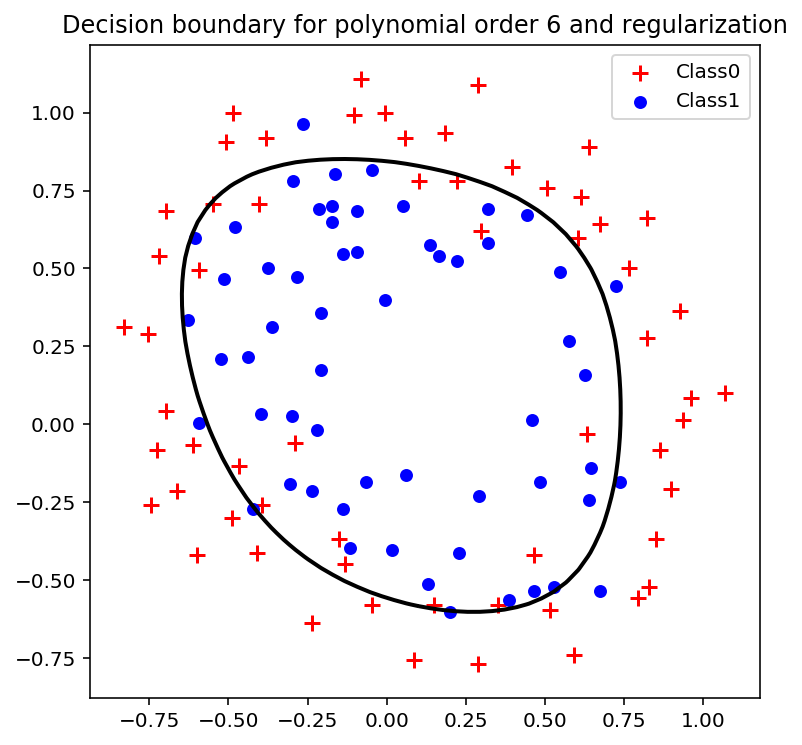

In [17]:
#YOUR CODE HERE

# accuracy
def compute_accuracy(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return accuracy

ans7 = compute_accuracy(X,w_solution,y)
print(ans7)

# plot decision boundary
plot_decision_boundary(X,w_solution,data,'Decision boundary for polynomial order 6 and regularization',1)

### Q10: Compute the accuracy of the validation set with the predicitive model learned on the training set with the polynomial degree=6 and for the regularization values $\lambda$=0 (no regularization) and $\lambda$=0.1?
<hr>

☐ validation accuracy for $\lambda$=0/$\lambda$=0.1 = 82.0%/93.0%<br>
☐ validation accuracy for $\lambda$=0/$\lambda$=0.1 = 88.0%/81.0%<br>
☐ validation accuracy for $\lambda$=0/$\lambda$=0.1 = 83.0%/90.0%<br>
☐ validation accuracy for $\lambda$=0/$\lambda$=0.1 = 87.0%/84.0%<br>


[[0.51064233]]
87.0
95.0


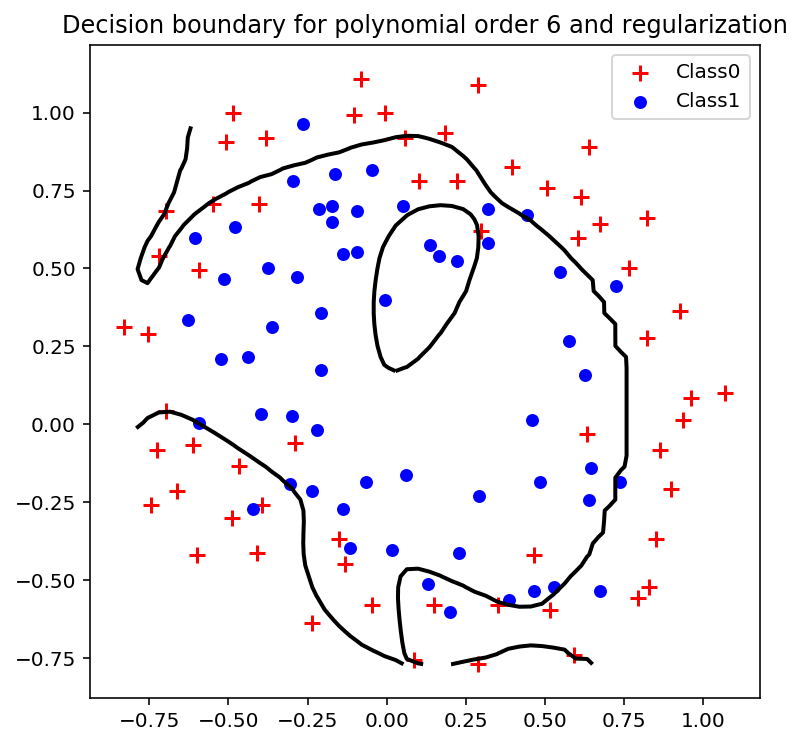

In [20]:
# import validation data with numpy
val_data = np.loadtxt('data/lab02_val_data.txt', delimiter=',')
degree = 6 
poly = PolynomialFeatures(degree)
X = poly.fit_transform(val_data[:,0:2])
y = val_data[:,2][:,None]

#YOUR CODE HERE
from scipy.optimize import minimize
initial_w = np.zeros((X.shape[1],1)) # initial value
reg = 0.1
result = minimize(loss_logreg, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':500})
w_solution = np.array(result.x)[:,None]

print(loss_logreg(w_solution,X,y,reg))

# accuracy
def compute_accuracy(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return accuracy

ans9a = compute_accuracy(X,w_solution,y)
print(ans9a)

reg = 0
result = minimize(loss_logreg, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':500})
w_solution = np.array(result.x)[:,None]

ans9b = compute_accuracy(X,w_solution,y)
print(ans9b)

# plot decision boundary
plot_decision_boundary(X,w_solution,data,'Decision boundary for polynomial order 6 and regularization',1)